# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


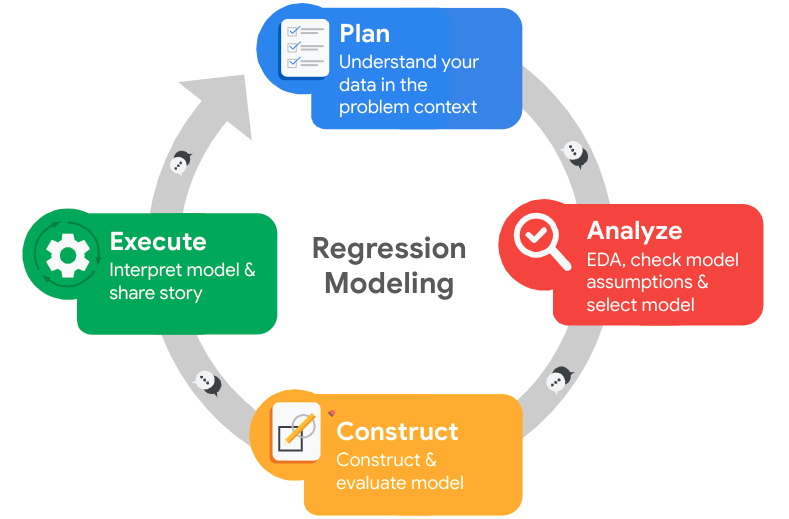

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [76]:
# Import packages
### YOUR CODE HERE ###
#functional
import pandas as pd
import numpy as np

#machine learning librarys
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

#visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#show total dataframe
pd.set_option('display.max_rows', None)

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [77]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head(10)

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   
5                0.41             0.50               2                   153   
6                0.10             0.77               6                   247   
7                0.92             0.85               5                   259   
8                0.89             1.00               5                   224   
9                0.42             0.53               2                   142   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   
5                   3              0     1                      0      sales   
6                   4              0     1                      0      sales   
7                   5              0     1                      0      sales   
8                   5              0     1                      0      sales   
9                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low  
5     low  
6     low  
7     low  
8     low  
9     low

## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [78]:
# Gather basic information about the data
### YOUR CODE HERE ###
df = df0.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [79]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [80]:
# Display all column names
### YOUR CODE HERE ###
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [81]:
# Rename columns as needed
### YOUR CODE HERE ###
df.columns = df.columns.str.lower()

#giving a bit more meaning to some names
df = df.rename(columns={'time_spend_company':'years_at_company',\
                        'promotion_last_5years':'promoted_last_5years',\
                        'average_montly_hours':'average_monthly_hours',\
                        'number_project':'number_projects',\
                        'salary':'salery'})


# Display all column names after the update
### YOUR CODE HERE ###
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_projects',
       'average_monthly_hours', 'years_at_company', 'work_accident', 'left',
       'promoted_last_5years', 'department', 'salery'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [82]:
# Check for missing values
### YOUR CODE HERE ###
df.isna().sum(axis=0)

satisfaction_level       0
last_evaluation          0
number_projects          0
average_monthly_hours    0
years_at_company         0
work_accident            0
left                     0
promoted_last_5years     0
department               0
salery                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [83]:
# Check for duplicates
### YOUR CODE HERE ###
df.duplicated().sum(axis=0)

3008

In [84]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df[df.duplicated(keep=False)]

satisfaction_level  last_evaluation  number_projects  \
0                    0.38             0.53                2   
1                    0.80             0.86                5   
2                    0.11             0.88                7   
3                    0.72             0.87                5   
4                    0.37             0.52                2   
5                    0.41             0.50                2   
6                    0.10             0.77                6   
7                    0.92             0.85                5   
8                    0.89             1.00                5   
9                    0.42             0.53                2   
10                   0.45             0.54                2   
11                   0.11             0.81                6   
12                   0.84             0.92                4   
13                   0.41             0.55                2   
14                   0.36             0.56                2   
15                   0.38             0.54                2   
16                   0.45             0.47                2   
17                   0.78             0.99                4   
18                   0.45             0.51                2   
19                   0.76             0.89                5   
20                   0.11             0.83                6   
21                   0.38             0.55                2   
22                   0.09             0.95                6   
23                   0.46             0.57                2   
24                   0.40             0.53                2   
25                   0.89             0.92                5   
26                   0.82             0.87                4   
27                   0.40             0.49                2   
28                   0.41             0.46                2   
29                   0.38             0.50                2   
30                   0.09             0.62                6   
31                   0.45             0.57                2   
32                   0.40             0.51                2   
33                   0.45             0.55                2   
34                   0.84             0.87                4   
35                   0.10             0.94                6   
36                   0.38             0.46                2   
37                   0.45             0.50                2   
38                   0.11             0.89                6   
39                   0.41             0.54                2   
40                   0.87             0.88                5   
41                   0.45             0.48                2   
42                   0.40             0.46                2   
43                   0.10             0.80                7   
44                   0.09             0.89                6   
45                   0.84             0.74                3   
46                   0.40             0.55                2   
47                   0.57             0.70                3   
48                   0.40             0.54                2   
49                   0.43             0.47                2   
50                   0.13             0.78                6   
51                   0.44             0.55                2   
52                   0.38             0.55                2   
53                   0.39             0.54                2   
54                   0.10             0.92                7   
55                   0.37             0.46                2   
56                   0.11             0.94                7   
57                   0.10             0.81                6   
58                   0.38             0.54                2   
59                   0.85             1.00                4   
60                   0.85             0.91                5   
61                   0.11             0.93                7   
62                   0.10             

In [85]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df = df.drop_duplicates(keep='first').reset_index(drop=True)

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df[df.duplicated(keep=False)] #check if dropping was sucessful
df.head(10)

satisfaction_level  last_evaluation  number_projects  \
0                0.38             0.53                2   
1                0.80             0.86                5   
2                0.11             0.88                7   
3                0.72             0.87                5   
4                0.37             0.52                2   
5                0.41             0.50                2   
6                0.10             0.77                6   
7                0.92             0.85                5   
8                0.89             1.00                5   
9                0.42             0.53                2   

   average_monthly_hours  years_at_company  work_accident  left  \
0                    157                 3              0     1   
1                    262                 6              0     1   
2                    272                 4              0     1   
3                    223                 5              0     1   
4                    159                 3              0     1   
5                    153                 3              0     1   
6                    247                 4              0     1   
7                    259                 5              0     1   
8                    224                 5              0     1   
9                    142                 3              0     1   

   promoted_last_5years department  salery  
0                     0      sales     low  
1                     0      sales  medium  
2                     0      sales  medium  
3                     0      sales     low  
4                     0      sales     low  
5                     0      sales     low  
6                     0      sales     low  
7                     0      sales     low  
8                     0      sales     low  
9                     0      sales     low

### Check outliers

Check for outliers in the data.

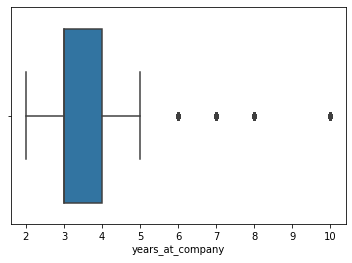

In [86]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
sns.boxplot(x=df['years_at_company'])


In [87]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###
print(df['years_at_company'].quantile(q=0.95))
df[df['years_at_company'] > df['years_at_company'].quantile(q=0.95)].count()['satisfaction_level']

# if we wanna remove outliers this should probaply also be done for average_monthly_hours and number_projects

6.0


282

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [88]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
df.groupby(['left']).count()['satisfaction_level']

# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print(df['left'].value_counts(normalize=True)*100)
df['department'].value_counts()

0    83.39588
1    16.60412
Name: left, dtype: float64


sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

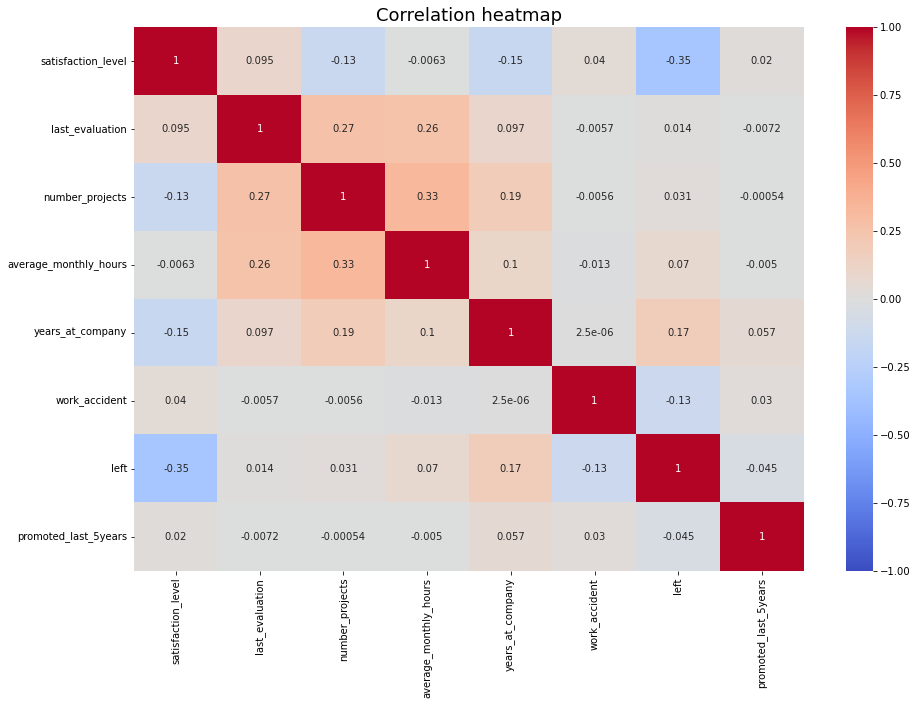

In [89]:
# Correlation heatmap to get an overview wich variables are linear correlated
### YOUR CODE HERE ###

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(method='pearson'), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap', fontsize=18)
plt.show();


left(the target) seems to correlate best with satisfaction level , years_at_company and work_accident.

If models (like multi linear regression) are chosen that can't handle collinearity: the highest multicollinearity is still fine with a Pearson correlation coefficient of 0.33. Typically, you would consider it as a problem if it were higher than 0.6-0.8. So, no modifications would be needed. One could still test if results might improve if you drop one of the variables with highest collinearity.

It might be interesting to further investigate the variables with highest correlation.

But first let's focus on the cathegorical features. Which are not present in this matrix.

Text(0.5, 1.0, 'employees per salery group')

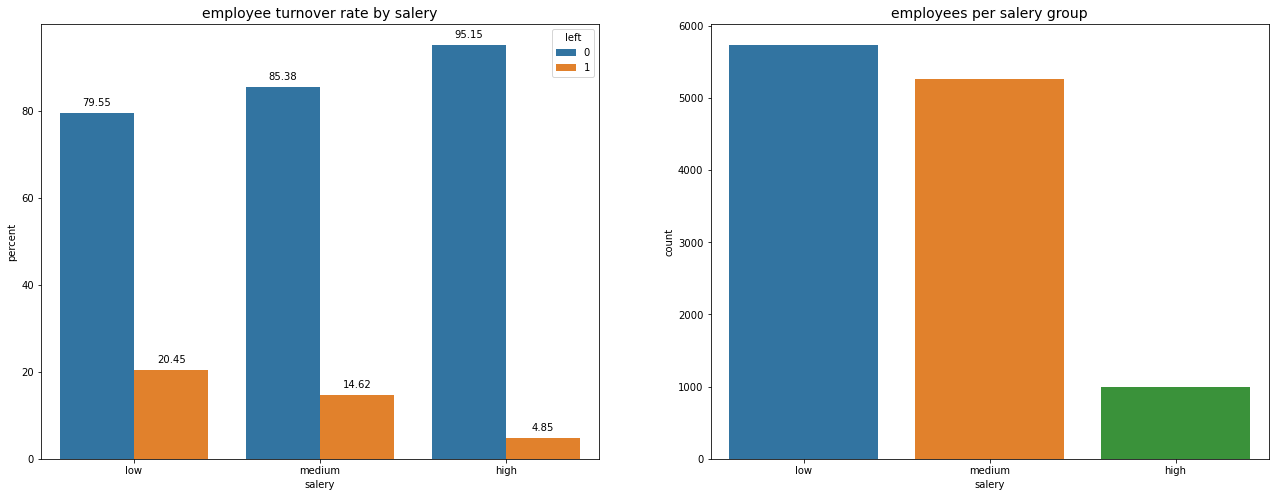

In [90]:
# Create a plot as needed
### YOUR CODE HERE ###
def calculate_percent(df, sub_cathegory, x_cathegory):
    """
    this function takes in a dataframe and two cathegorys and returns a df for visualisation. The function sets every
    x_cathegory to 100% and then subdivides these 100% into the sub_cathegorys. It basicly scales the counts of each class to
    100%. To achive compareability between classes.
    
    input:
        df:              (Pandas_Data_Frame)  containing the Data which should be counted
        sub_cathegory:   (str)                the cathegorys the x cathegory is devided into
        x_cathegory:     (str)                the cathegorys the df is devided into
        
    returns:
        df_percent:      (Pandas_Data_Frame)  containing the percent data that should be plotted
    
    """
    
    count_x_cathegory = df.value_counts(x_cathegory)
    df_percent = pd.DataFrame()
    for i in range(len(count_x_cathegory)):
        sub_df = df[df[x_cathegory] == count_x_cathegory.index[i]]
        sub_df = sub_df[sub_cathegory].value_counts(normalize=True)*100
        sub_df = sub_df.reset_index()
        sub_df = sub_df.rename(columns={'index':sub_cathegory, sub_cathegory:'percent'})
        x_cathegorys = pd.Series([count_x_cathegory.index[i]] * len(sub_df))
        x_cathegorys.name = x_cathegory
        sub_df = pd.concat([sub_df, x_cathegorys],axis=1)
        df_percent = pd.concat([df_percent, sub_df]).reset_index(drop=True)
        
    return df_percent
    
plot_df = calculate_percent(df,'left','salery')

fig, ax = plt.subplots(1, 2, figsize = (22,8))

ax[0] = sns.barplot(data=plot_df, x="salery", y="percent", hue="left", ax=ax[0])
#plt.xticks(size = 12)
ax[0].set_title('employee turnover rate by salery', fontsize='14')

for p in ax[0].patches:
    value = round(p.get_height(), 2)
    ax[0].annotate(f'{value}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


ax[1] = sns.countplot(data=df,x="salery", ax=ax[1])
ax[1].set_title('employees per salery group', fontsize='14')

Looking at the salery and the percentage at what people tend to leave in there paygroup it seem that the lower the paygroup the more people are leaving.

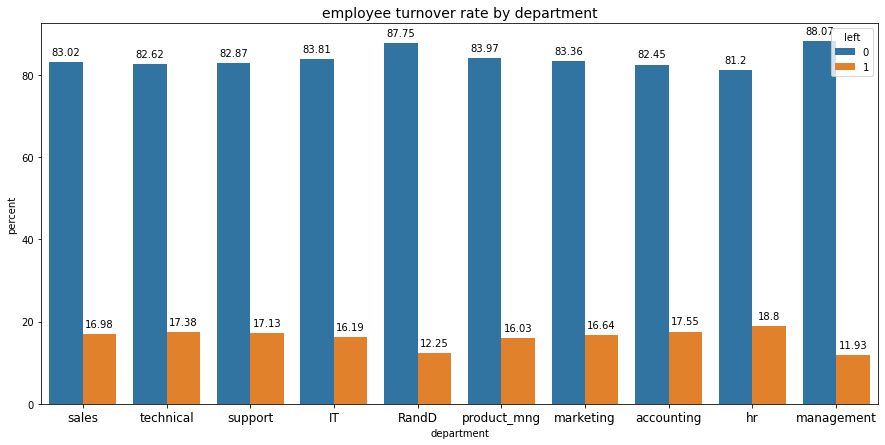

In [91]:
# Create a plot as needed
### YOUR CODE HERE ###
plot_df = calculate_percent(df,'left','department')

plt.figure(figsize=(15,7))
ax = sns.barplot(data=plot_df, x="department", y="percent", hue="left")
plt.xticks(size = 12)
ax.set_title('employee turnover rate by department', fontsize='14')

for p in ax.patches:
    value = round(p.get_height(), 2)
    ax.annotate(f'{value}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

Text(0.5, 1.0, 'employees per department')

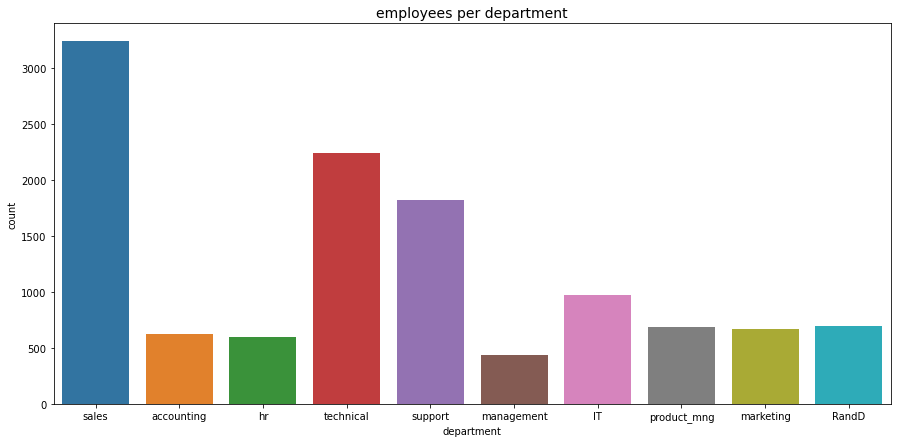

In [92]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=df,x="department")
ax.set_title('employees per department', fontsize='14')

Here the difference ranges from 11.93% to 18.8 % of people leaving a specific department. Which is a lower impact than salary. The changes could also be due to chance or demand in jobs, for example IT and technical jobs are typical jobs where more open job positions exist, then for management.

This looks more like a weak predictor.

next the high correlated variables will be taken into focus.

Text(0.5, 1.0, 'Years at the company histogram')

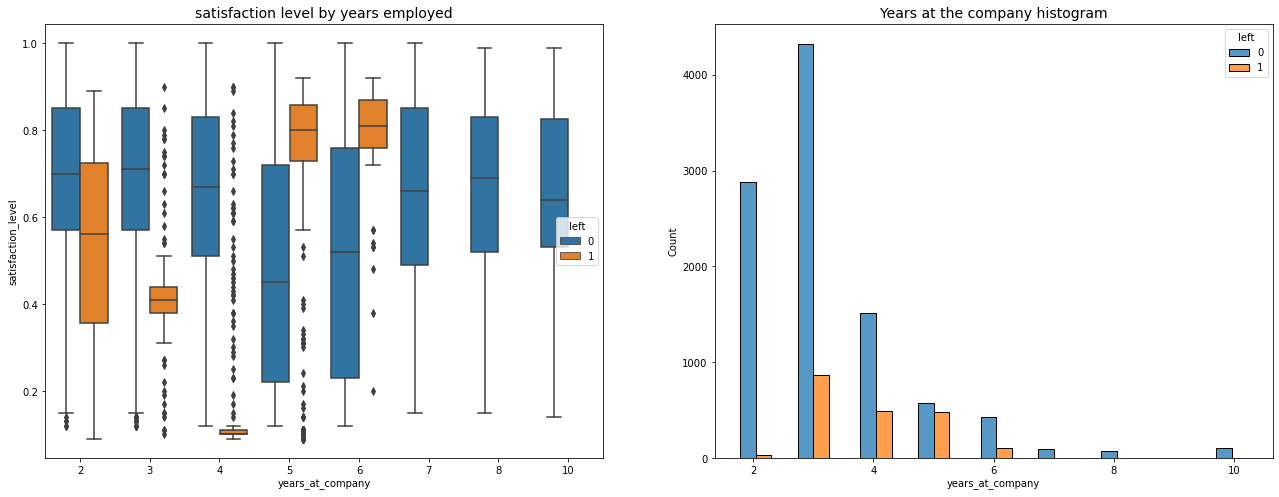

In [93]:
# Create a plot as needed
### YOUR CODE HERE ###
fig, ax = plt.subplots(1, 2, figsize = (22,8))

sns.boxplot(data=df, x="years_at_company", y="satisfaction_level", hue="left", ax=ax[0])
ax[0].set_title('satisfaction level by years employed', fontsize='14')
sns.histplot(data=df, x="years_at_company", hue="left",multiple='dodge', shrink=6, ax=ax[1])
ax[1].set_title('Years at the company histogram', fontsize='14')

There are different things to mention in this graph. in general you can see that after 7 years at the company typically no one leaves anymore. Which proves that there must be some kind of connection between leaving employees and years at the company. Reason might be "lock in" effects or worse Job chances the older you get.

A little different it seems to be for satisfaction level. Even if in the overall trend there is a correlation you can observe here that for the first 4 years the satisfaction level of the people that left is lower. And after 4 years people that are very satisfied seem to leave. That indicates that there is no linear correlation. But still the distributions of left employees vs. employees that stayed are very different for every year, which is a good sign, because that indicates that the two groups can somehow be separated. And reason for the happy people leaving after 5-6 years could be, that you have learned enough in one position and probably want to learn more somewhere else.

now i will again plot all variables against each other to see if there are any other patterns that might not be linear.

Text(0.5, 1.02, 'Pairplot of all numeric feature combinations')

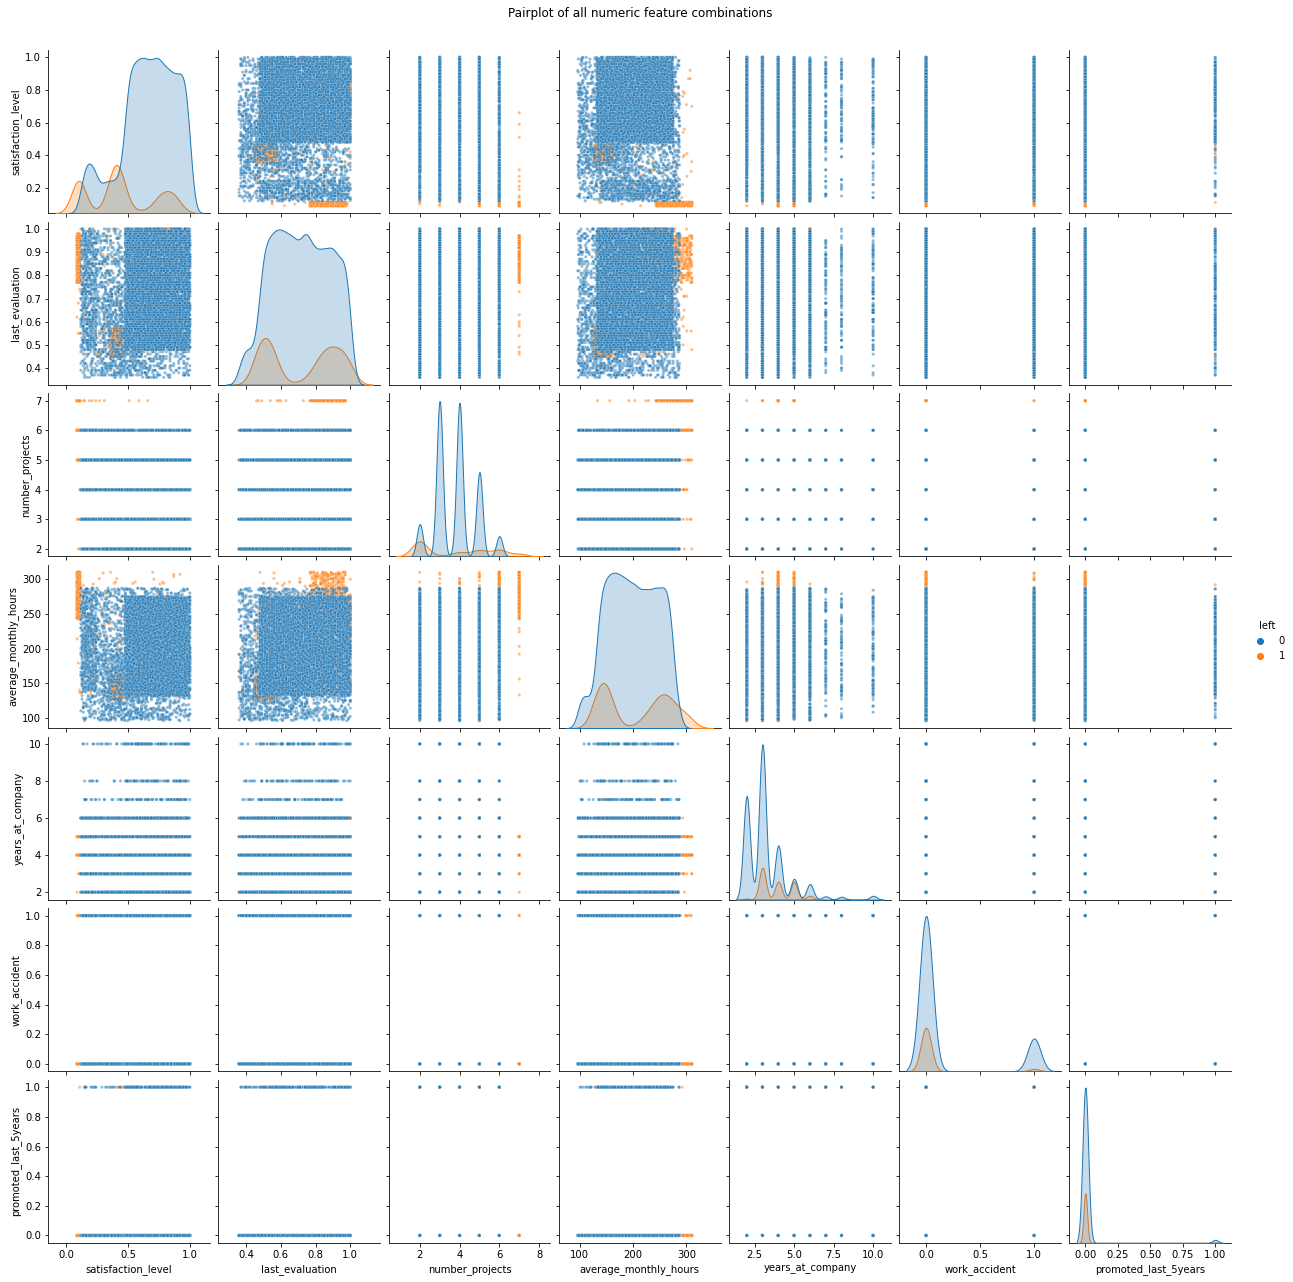

In [94]:
# Create a plot as needed
### YOUR CODE HERE ###
ax = sns.pairplot(df, hue="left", plot_kws={'s': 10, 'alpha': 0.5})
ax.fig.suptitle("Pairplot of all numeric feature combinations", y=1.02)

This might not be the easiest graph to understand at first, but this gives a pretty good overview. There are a lot of interesting things here which are worth mentioning. 

1) distributions:
The distributions don't really look like normal distributions, especially the distributions of the employees that left the company. They also look quite different to the distributions of the ones that stayed. 

2) feature combinations:
there are a few worth mentioning that look very strange. For example, the avarage_monthly_hours and last evaluation. It looks like the Data is aggregated in some perfect squares which is most likely due to the reason we are dealing with artificial data. In reality this would suggest that the Data was manipulated before we started to analyze.
But also, other features have a behavior where you have nearly a clean cut between employees that left and ones that did not. That is a good sign that we will be able to find a model that can separate those points.

3) further investigations
I would like to see the plot average_monthly_hours against satisfaction_level and last_evaluation a bit more in detail to maybe draw further conclusions.


Text(0.5, 1.0, 'average_monthly_hours by satisfaction_level')

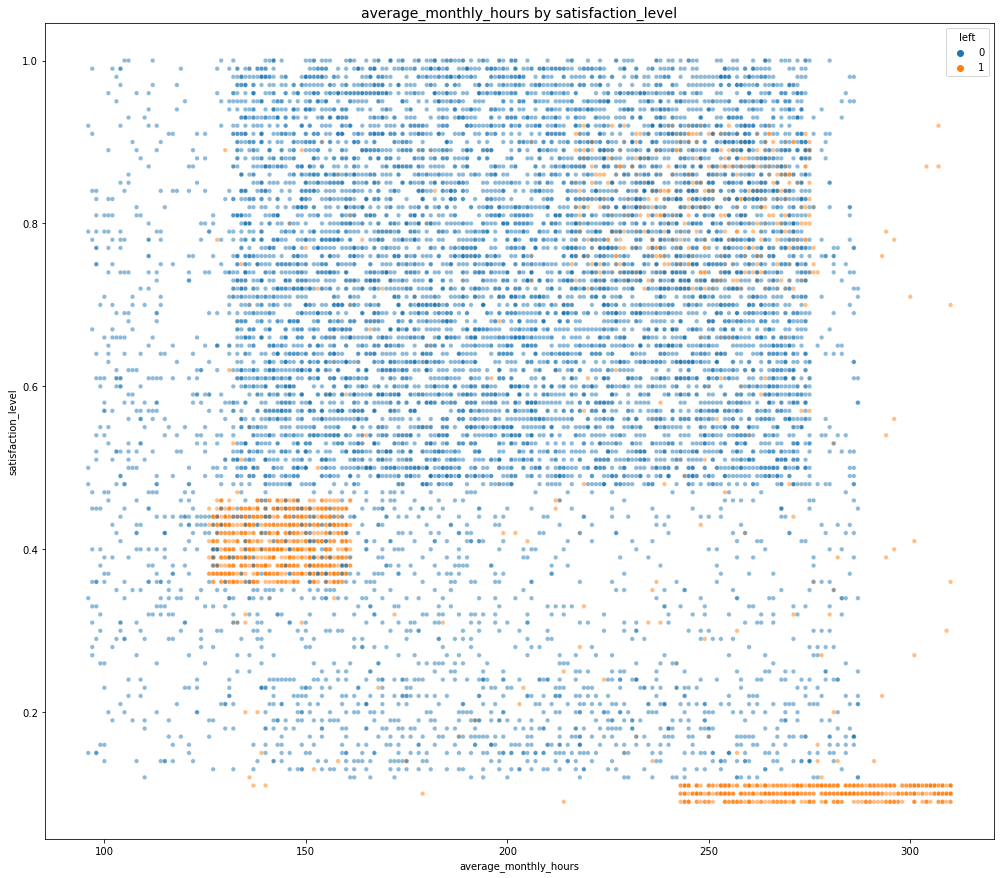

In [95]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(17,15))
ax = sns.scatterplot(data=df, x="average_monthly_hours", y="satisfaction_level", hue="left", s=20, alpha=0.5)

ax.set_title('average_monthly_hours by satisfaction_level', fontsize='14')

Now you can see it even more clear. there are 3 clusters of people that leave the company. And the rest looks more like random noise. And one bigger cluster of people that stay and then some random noise in the total frame. This looks quite far from reality. But if one had to explain why those three clusters might be the ones leaving. 

The easiest to explain are probaply the ones with very low satisfaction that also seem to be working a lot. If you are not satisfied you go thats it. 

For the second cluster the one a little bit less then 50% satisfied and working very few time a month are harder to explain. I would guess less time working makes you happier but seems that this is not true for all. Maybe there are psychological resons for example the feeling of social preasure becaus a lot of people around you work a lot more then you.

and the third is also not as easy to explain but maybe they are the group that thinks they wanna learn somthing new caus they are in such a good position with enough expirience and a lot of open jobs on the market.

Text(0.5, 1.0, 'last_valuation by satisfaction_level')

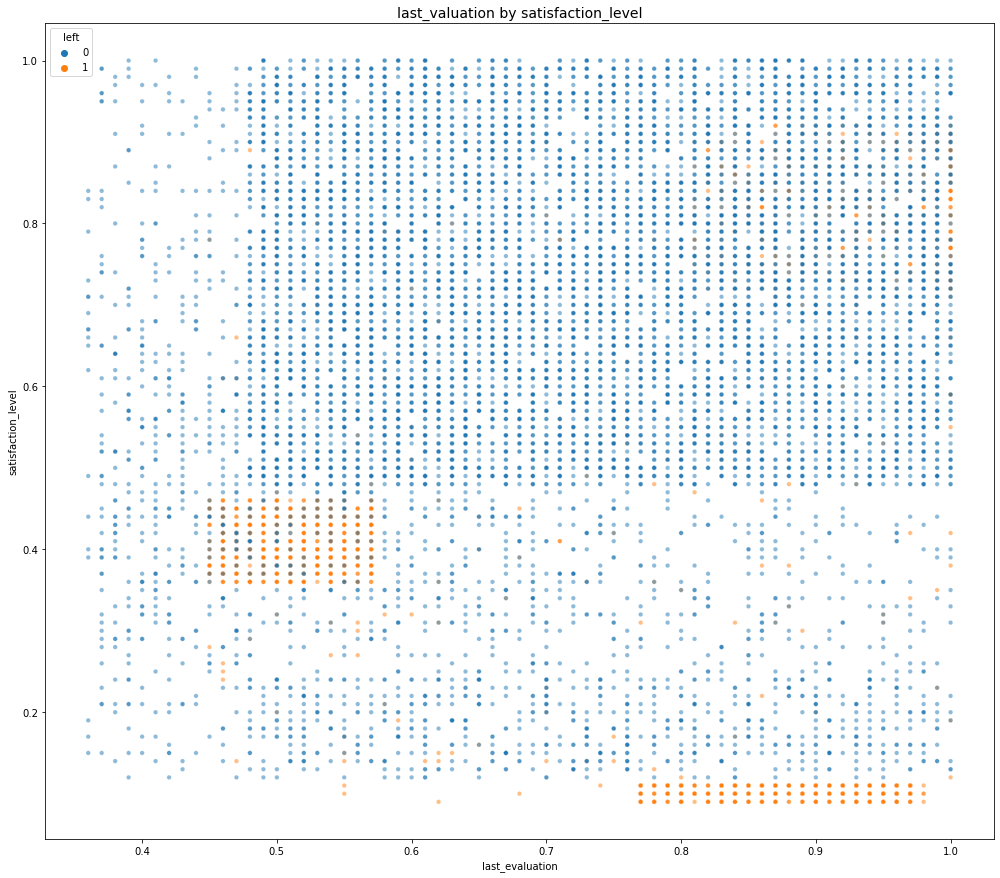

In [96]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(17,15))
ax = sns.scatterplot(data=df, x="last_evaluation", y="satisfaction_level", hue="left", s=20, alpha=0.5)

ax.set_title('last_valuation by satisfaction_level', fontsize='14')


The pattern here looks nearly identical to before only the upper right cluster is a lot lighter. A very artificial distribution. And no new explanations I could offer. just an approval of what we already saw.

one more thing that could also be interesting is a combination of number_projects and satisfaction_level, last_evaluation, average_monthly_hours, years_at_company. But thouse four again look quite similar. So thouse will be shown and evaluated parallel.

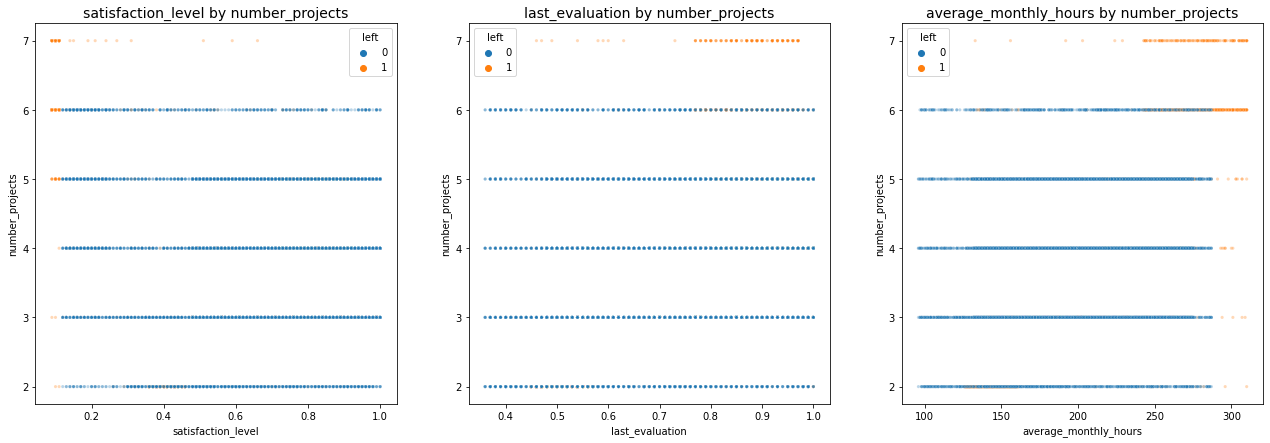

In [97]:
# Create a plot as needed
### YOUR CODE HERE ###
fig, ax = plt.subplots(1, 3, figsize = (22,7))
ax[0].set_title('satisfaction_level by number_projects', fontsize='14')
sns.scatterplot(data=df, x="satisfaction_level", y="number_projects", hue="left", s=10, alpha=0.3, ax=ax[0])
ax[1].set_title('last_evaluation by number_projects', fontsize='14')
sns.scatterplot(data=df, x="last_evaluation", y="number_projects", hue="left", s=10, alpha=0.3, ax=ax[1])
ax[2].set_title('average_monthly_hours by number_projects', fontsize='14')
sns.scatterplot(data=df, x="average_monthly_hours", y="number_projects", hue="left", s=10, alpha=0.3, ax=ax[2])


We can see that the data points of employees that left and that stayed are again quite well separated. And you can also see that a project count of 7 projects almost always leads to an employee leaving. This could be due to many changes in their working environment that are hard to adapt to. 

For all feature combinations a high number of projects leads to more employees leaving.
As we already saw, low satisfaction levels also lead to an employee leaving. And, a lot of monthly hours seem to be leading to employees leaving. In the last evaluation you can maybe see a slight tendency towards high evaluation.

now we still should have closer look at the rest of features present in the dataset not looked closly at until now. Firstly here we will have a look if having a workaccident is a factor for people leaving.

Text(0.5, 1.0, 'employees count work accident')

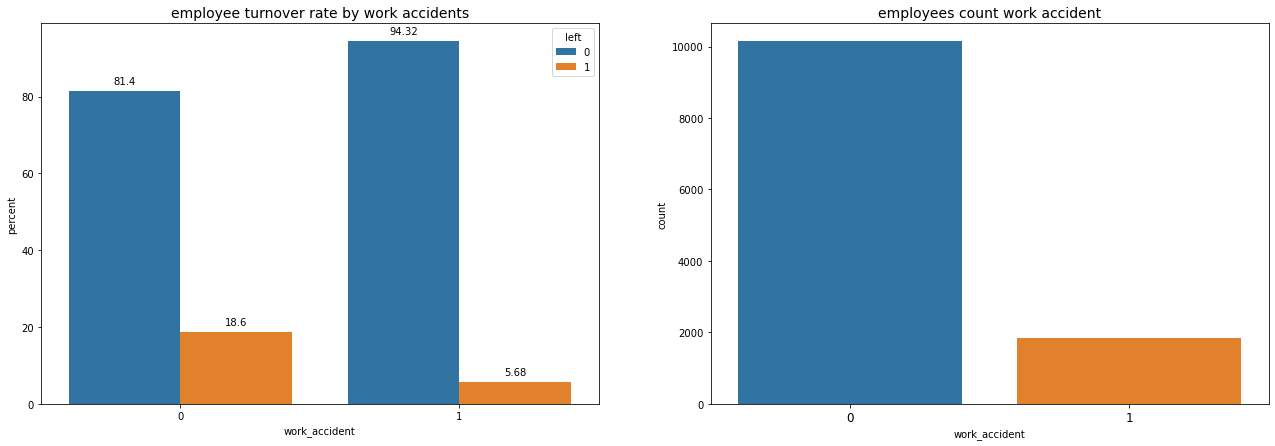

In [98]:
# Create a plot as needed
### YOUR CODE HERE ###
plot_df = calculate_percent(df,'left','work_accident')

fig, ax = plt.subplots(1, 2, figsize = (22,7))

ax[0] = sns.barplot(data=plot_df, x="work_accident", y="percent", hue="left", ax=ax[0])
plt.xticks(size = 12)
ax[0].set_title('employee turnover rate by work accidents', fontsize='14')

for p in ax[0].patches:
    value = round(p.get_height(), 2)
    ax[0].annotate(f'{value}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
ax[1] = sns.countplot(data=df,x='work_accident')
ax[1].set_title('employees count work accident', fontsize='14')

People that had a work accident are even the ones that tend to leave fewer times. But this can also be a secondary effect if people are in the company longer there is more time and chance that a work accident can happen or care for people that had accidents is very high in this company which is good, but should not lead to the conclusion that more people need to have accidents. This feature can be included in the model but you should be aware to not draw unethical implications from the results.

Text(0.5, 1.0, 'employees count promoted last 5years')

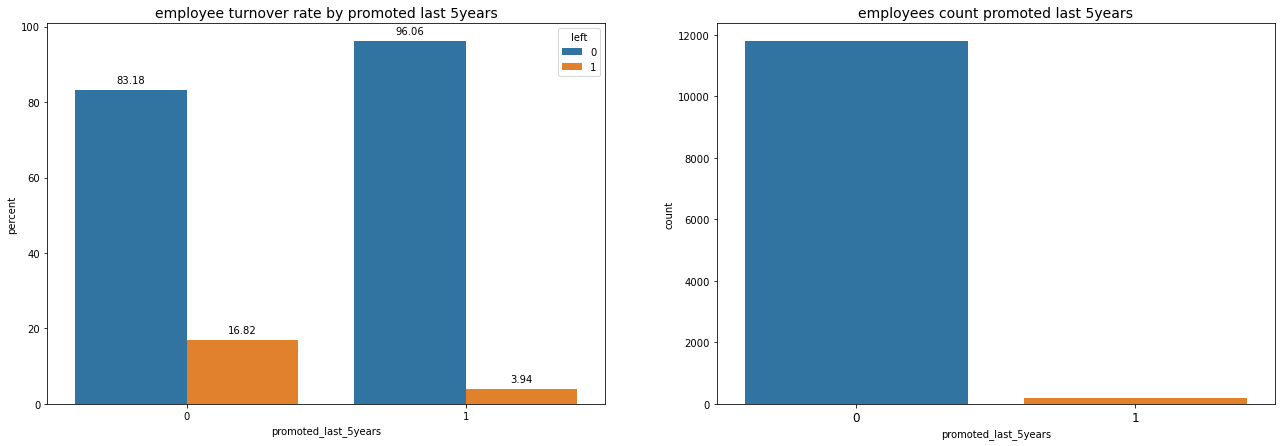

In [99]:
# Create a plot as needed
### YOUR CODE HERE ###
plot_df = calculate_percent(df,'left','promoted_last_5years')

fig, ax = plt.subplots(1, 2, figsize = (22,7))

ax[0] = sns.barplot(data=plot_df, x="promoted_last_5years", y="percent", hue="left", ax=ax[0])
plt.xticks(size = 12)
ax[0].set_title('employee turnover rate by promoted last 5years', fontsize='14')

for p in ax[0].patches:
    value = round(p.get_height(), 2)
    ax[0].annotate(f'{value}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
ax[1] = sns.countplot(data=df,x='promoted_last_5years')
ax[1].set_title('employees count promoted last 5years', fontsize='14')

It seems that a promotion is a very good indicator if somone will stay at a company. But in gereral there are not a lot promotions in the company. The possibility that this is by chance should also be considred. More insights about the randomness could be given by a hypothesis test for example chi-square.

### Insights

Linear correlations are not to strong in the Dataset but there are defenetly other clear patterns that can be observed. Based on that a suitable statistical/Machine learning Model should be chosen. The Pattern in the Data also looks quite artifical which is most likly due to the fact that this is no real dataset only a generated one. 

The best linear correlating feature is satisfaction level which is negative correlated to leaving the company which sounds counterintuitive at first.

The cluster patterns observed are present in satisfaction level against avarage mothly hours and last evaluation. This could also be an starting point for a statistical/Machine learning Model.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



- the data put into the model looks very artificial
- all variables will be included to give as much information as possible to the model. Since the collinearity is also not too bad this will most likely be no problem even for a logistic regression model.
- yes, the assumptions were tested and checked. (collinearity, outliers, categorical target for logistic regression)
- Logistic regression not well with very low recall and precision but the Gradient Boosting Model works very good with high scores for recall and precision
- Yes, the logistic regression model could have either a layer of transformations before putting into the model or feature engineering done to improve results. And the Gradient Boosting Model could also still get more engineered features to improve performance even further. 
- https://en.wikipedia.org/wiki/Logistic_regression, https://scikit-learn.org/stable/, https://xgboost.readthedocs.io/en/stable/ and course material, 
- At this stage I would say there are no ethical concerns later in the evaluation some features could lead to unethical implications but that is depending on the results.

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

It is a classification task.

### Identify the types of models most appropriate for this task.

I would consider logistic regression first because that is more explainable, and the project goal is to find out what the company could change to reduce employees leaving. In other words, the goal is mostly to understand why employees are leaving and not to build a model that can predict best which employees are leaving.

Better predictive power might be provided by Random Forest or Gradient boosting. There you can still at least get a list of what the most important features were but not how they contribute. This might be a second option to compare. If Logistic regression offers bad results and this has better predictive power it might capture importance of the features better than logistic regression.

### Modeling

1) Logistic Regression

no feature engineering. If done this must be made very aware of the fact that logistic regression can't handle collinearity well. And feature combinations can become problematic for collinearity. To avoid that problem at this stage we will not engineer more features. For later optimisation this could be a topic.

In [100]:
### YOUR CODE HERE ###
df_log_reg = df.copy()

# convert department and salery to numeric
df_log_reg['salery'] = df_log_reg['salery'].replace(['low','medium','high'],[0,1,2])
df_log_reg = pd.get_dummies(df_log_reg, drop_first=False)


df_log_reg.head()

satisfaction_level  last_evaluation  number_projects  \
0                0.38             0.53                2   
1                0.80             0.86                5   
2                0.11             0.88                7   
3                0.72             0.87                5   
4                0.37             0.52                2   

   average_monthly_hours  years_at_company  work_accident  left  \
0                    157                 3              0     1   
1                    262                 6              0     1   
2                    272                 4              0     1   
3                    223                 5              0     1   
4                    159                 3              0     1   

   promoted_last_5years  salery  department_IT  department_RandD  \
0                     0       0              0                 0   
1                     0       1              0                 0   
2                     0       1              0                 0   
3                     0       0              0                 0   
4                     0       0              0                 0   

   department_accounting  department_hr  department_management  \
0                      0              0                      0   
1                      0              0                      0   
2                      0              0                      0   
3                      0              0                      0   
4                      0              0                      0   

   department_marketing  department_product_mng  department_sales  \
0                     0                       0                 1   
1                     0                       0                 1   
2                     0                       0                 1   
3                     0                       0                 1   
4                     0                       0                 1   

   department_support  department_technical  
0                   0                     0  
1                   0                     0  
2                   0                     0  
3                   0                     0  
4                   0                     0

Logistic regression is sensitive to outliers so these should be imputed before the model gets trained. To check that all continues variables are plotted in a boxplot.

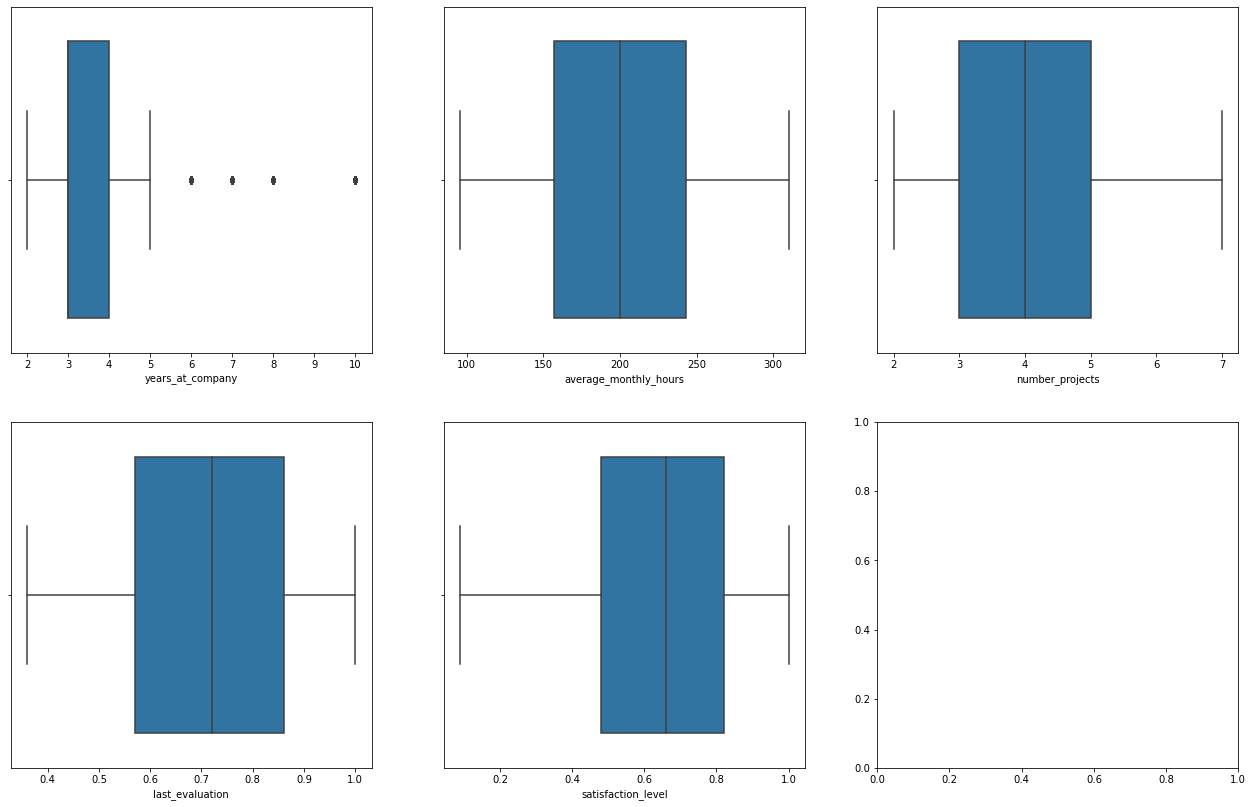

In [101]:
fig, ax = plt.subplots(2, 3, figsize = (22,14))
ax[0][0] = sns.boxplot(x=df_log_reg['years_at_company'], ax=ax[0][0])
ax[0][1] = sns.boxplot(x=df_log_reg['average_monthly_hours'], ax=ax[0][1])
ax[0][2] = sns.boxplot(x=df_log_reg['number_projects'], ax=ax[0][2])
ax[1][0] = sns.boxplot(x=df_log_reg['last_evaluation'], ax=ax[1][0])
ax[1][1] = sns.boxplot(x=df_log_reg['satisfaction_level'], ax=ax[1][1])

As we can see only years_at_company is victim to outliers so those will be imputed in the next step.

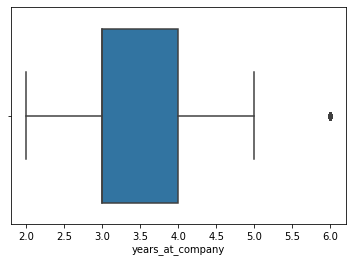

In [102]:
#set all values that are above 0.95 percetile to the 0.95th percentile
impute_threshold = df_log_reg['years_at_company'].quantile(q=0.95)
df_log_reg.loc[df_log_reg['years_at_company'] > impute_threshold, 'years_at_company'] = impute_threshold

#validate that it worked
sns.boxplot(x=df_log_reg['years_at_company'])

now seperate the dataset into targe and features

In [103]:
y = df_log_reg['left']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [104]:
X = df_log_reg.drop(columns=['left'])
X.head()

satisfaction_level  last_evaluation  number_projects  \
0                0.38             0.53                2   
1                0.80             0.86                5   
2                0.11             0.88                7   
3                0.72             0.87                5   
4                0.37             0.52                2   

   average_monthly_hours  years_at_company  work_accident  \
0                    157                 3              0   
1                    262                 6              0   
2                    272                 4              0   
3                    223                 5              0   
4                    159                 3              0   

   promoted_last_5years  salery  department_IT  department_RandD  \
0                     0       0              0                 0   
1                     0       1              0                 0   
2                     0       1              0                 0   
3                     0       0              0                 0   
4                     0       0              0                 0   

   department_accounting  department_hr  department_management  \
0                      0              0                      0   
1                      0              0                      0   
2                      0              0                      0   
3                      0              0                      0   
4                      0              0                      0   

   department_marketing  department_product_mng  department_sales  \
0                     0                       0                 1   
1                     0                       0                 1   
2                     0                       0                 1   
3                     0                       0                 1   
4                     0                       0                 1   

   department_support  department_technical  
0                   0                     0  
1                   0                     0  
2                   0                     0  
3                   0                     0  
4                   0                     0

Setting up the train test split

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

#validate that it worked
print(X_train.shape)
X_test.shape

(8993, 18)


(2998, 18)

In [106]:
log_reg_model = LogisticRegression(random_state=42, max_iter=1000).fit(X_train, y_train)

Testing the model

In [107]:
y_pred = log_reg_model.predict(X_test)

Visualize results with confusion matrix

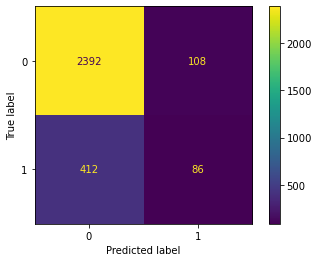

In [108]:
# Compute values for confusion matrix
log_reg_cm = confusion_matrix(y_test, y_pred, labels=log_reg_model.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_reg_cm, 
                                  display_labels=log_reg_model.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

plt.show()

The confusion matrix shows that most labels are predicted correctly as true negatives. The negatives get predicted way better then the True Trues. But lets see the metrics (precision, recall, f1-score)

In [109]:

print(classification_report(y_test, y_pred, target_names=['Predicted would not leave', 'Predicted would leave']))

# Get the coefficients and intercept
coefficients = log_reg_model.coef_[0]
intercept = log_reg_model.intercept_[0]

# Create a DataFrame to store feature names and coefficients
coefficients_df = pd.DataFrame({'Feature': ['Intercept'] + list(X.columns),
                                'Coefficient': [intercept] + list(coefficients)})

print(coefficients_df)

                           precision    recall  f1-score   support

Predicted would not leave       0.85      0.96      0.90      2500
    Predicted would leave       0.44      0.17      0.25       498

                 accuracy                           0.83      2998
                macro avg       0.65      0.56      0.58      2998
             weighted avg       0.79      0.83      0.79      2998

                   Feature  Coefficient
0                Intercept    -0.742421
1       satisfaction_level    -3.768331
2          last_evaluation     0.556595
3          number_projects    -0.318866
4    average_monthly_hours     0.003864
5         years_at_company     0.492980
6            work_accident    -1.386080
7     promoted_last_5years    -0.818791
8                   salery    -0.620147
9            department_IT    -0.029991
10        department_RandD    -0.459865
11   department_accounting     0.008078
12           department_hr     0.053120
13   department_management    -0.30

This does not look to promising negatives get predicted quite well, but we want to predict which employees are at risk of leaving the company. And there we have a precision of 0.44 and recall of 0.17 which is quite low. 

Satisfaction level has in this model the most impact on the result. But most likely the coefficients won't tell us anything valuable about the real relationships because the model has so many errors in it. Logistic regression might not be so well suited for this kind of separation problem. There could also be possibilitys to still be able to use regression with a form of kernel trick or transformations but that is not as trivial, and we will first test a different model and see if that works. 


### Gradient Boosting

Here feature engineering can be done without problem becaus Decision Tree based Models can handel coliniarity very good. Also Outlier imputing will not be necesery here becaus this kind of model can also handel those quite good. 

In [110]:
df_EGB = df.copy()

# convert department and salery to numeric
df_EGB['salery'] = df_EGB['salery'].replace(['low','medium','high'],[0,1,2])
df_EGB = pd.get_dummies(df_EGB, drop_first=False)

#possebly important features:

df_EGB['dissatisfied'] = df_EGB['satisfaction_level'] < 0.1
df_EGB['overworked'] = df_EGB['average_monthly_hours'] > 270

df_EGB.head()


satisfaction_level  last_evaluation  number_projects  \
0                0.38             0.53                2   
1                0.80             0.86                5   
2                0.11             0.88                7   
3                0.72             0.87                5   
4                0.37             0.52                2   

   average_monthly_hours  years_at_company  work_accident  left  \
0                    157                 3              0     1   
1                    262                 6              0     1   
2                    272                 4              0     1   
3                    223                 5              0     1   
4                    159                 3              0     1   

   promoted_last_5years  salery  department_IT  ...  department_accounting  \
0                     0       0              0  ...                      0   
1                     0       1              0  ...                      0   
2                     0       1              0  ...                      0   
3                     0       0              0  ...                      0   
4                     0       0              0  ...                      0   

   department_hr  department_management  department_marketing  \
0              0                      0                     0   
1              0                      0                     0   
2              0                      0                     0   
3              0                      0                     0   
4              0                      0                     0   

   department_product_mng  department_sales  department_support  \
0                       0                 1                   0   
1                       0                 1                   0   
2                       0                 1                   0   
3                       0                 1                   0   
4                       0                 1                   0   

   department_technical  dissatisfied  overworked  
0                     0         False       False  
1                     0         False       False  
2                     0         False        True  
3                     0         False       False  
4                     0         False       False  

[5 rows x 21 columns]

Two features that might make it easyer for the model to understand where the Data is seperated.
Now Splitting in Training Data and target Data.

In [111]:
#y target X features
y = df_EGB['left']
X = df_EGB.drop(columns=['left'])

#splitting in Test Validation and Training Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train, random_state=42)

#validate that it worked
print(X_train.shape, X_test.shape, X_val.shape)




(7194, 20) (2399, 20) (2398, 20)


Define a function to output all desired results and metrics

In [112]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy',
                   }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          },
                         )

    return table

Initialising the XGBClassifier

In [113]:
xgb = XGBClassifier(objective='binary:logistic', random_state=42)

# 2. Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [6, 12],
             'min_child_weight': [3, 5],
             'learning_rate': [0.01, 0.1],
             'n_estimators': [300]
             }

# 3. Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# 4. Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=4, refit='recall')

Now train the model

In [114]:
%%time
xgb_cv.fit(X_train, y_train)

CPU times: user 1min 48s, sys: 205 ms, total: 1min 48s
Wall time: 54.8 s


GridSearchCV(cv=4, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     num_parallel_tree=None,
                                     objective='binary:logistic',
                                     predictor=None, random_state=42,
                                     reg_alpha=None, ...),
             iid='deprecate

Get the best score

In [115]:
xgb_cv.best_score_

0.910445332315773

Get best hyperparameters from hyperparameter optimasation

In [116]:
xgb_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 6,
 'min_child_weight': 3,
 'n_estimators': 300}

In [117]:
# Call 'make_results()' on the GridSearch object
results = make_results('XGB cv', xgb_cv, 'recall')
print(results)

    model  precision    recall        F1  accuracy
0  XGB cv   0.967326  0.910445  0.937741  0.979983


creat function that will generate test metrtics from the models

In [118]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
        model_name (string): Your choice: how the model will be named in the output table
        preds: numpy array of test predictions
        y_test_data: numpy array of y_test data

    Out:
        table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy]
                          })

    return table

In [119]:
# Use XGBoost model to predict on validation data
xgb_val_preds = xgb_cv.best_estimator_.predict(X_val)

# Get validation scores for XGBoost model
xgb_val_scores = get_test_scores('XGB val', xgb_val_preds, y_val)

# Append to the results table
results = pd.concat([results, xgb_val_scores], axis=0)
results

model  precision    recall        F1  accuracy
0   XGB cv   0.967326  0.910445  0.937741  0.979983
0  XGB val   0.973333  0.917085  0.944373  0.982068

Now only the test Dataset ist left to train on.

In [120]:
# Use XGBoost model to predict on test data
xgb_test_preds = xgb_cv.best_estimator_.predict(X_test)

# Get test scores for XGBoost model
xgb_test_scores = get_test_scores('XGB test', xgb_test_preds, y_test)

# Append to the results table
results = pd.concat([results, xgb_test_scores], axis=0)
results

model  precision    recall        F1  accuracy
0    XGB cv   0.967326  0.910445  0.937741  0.979983
0   XGB val   0.973333  0.917085  0.944373  0.982068
0  XGB test   0.951282  0.932161  0.941624  0.980825

As you can see the Validation and Test Dataset performs like this model which suggests that the model is not overfitting. The Gradient Boosting Model performs a lot better than our Logistic regression Model. All scores were over 0.9. Next step would be to plot the confusion matrix.

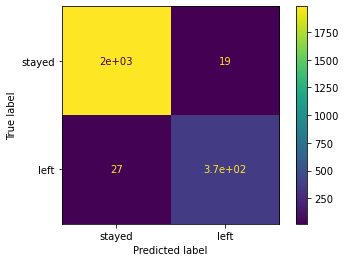

In [121]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, xgb_test_preds, labels=xgb_cv.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=['stayed', 'left'])
disp.plot();

This looks nearly too good to be true. In reality these good results would suggest overfitting. But because these are synthetic Data, this is a valid result. Now let's see which variables were the most predictive ones.

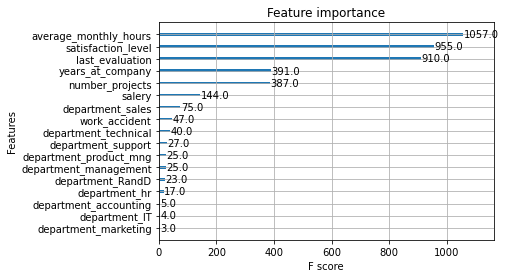

In [122]:
plot_importance(xgb_cv.best_estimator_);

average_monthly_hours and satisfaction level are the topmost important predictors for this model. 

But we might want to build a second model. We want to know the reasons people are leaving and the satisfaction score is most likely no reason, this is just an indicator so this should maybe be excluded, to see which variables are most important other than that one. There could also be Data leakage in some features. For example, satisfaction level is a score given by the employee, so maybe if they already decided to leave, they will change their score, and this would leak information about their decision that would not be available before you know someone left.

In [123]:
#y target X features
y = df_EGB['left']
X = df_EGB.drop(columns=['left','satisfaction_level'])

#splitting in Test Validation and Training Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train, random_state=42)

#validate that it worked
print(X_train.shape, X_test.shape, X_val.shape)




(7194, 19) (2399, 19) (2398, 19)


Set up Gradient Boosting model

In [124]:
xgb_2 = XGBClassifier(objective='binary:logistic', random_state=42)

# Instantiate the GridSearchCV object
xgb_cv_2 = GridSearchCV(xgb_2, cv_params, scoring=scoring, cv=4, refit='recall')

Fitting the model to the training Data

In [125]:
%%time
xgb_cv_2.fit(X_train, y_train)

CPU times: user 1min 53s, sys: 541 ms, total: 1min 53s
Wall time: 57.4 s


GridSearchCV(cv=4, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     num_parallel_tree=None,
                                     objective='binary:logistic',
                                     predictor=None, random_state=42,
                                     reg_alpha=None, ...),
             iid='deprecate

In [126]:
print(xgb_cv_2.best_score_)
print(xgb_cv_2.best_params_)

# Get validation scores for XGBoost model
xgb_results = make_results('XGB cv_2', xgb_cv_2, 'recall')

# Append to the results table
results = pd.concat([results, xgb_results], axis=0)
results

0.9054398330003816
{'learning_rate': 0.01, 'max_depth': 6, 'min_child_weight': 3, 'n_estimators': 300}


model  precision    recall        F1  accuracy
0    XGB cv   0.967326  0.910445  0.937741  0.979983
0   XGB val   0.973333  0.917085  0.944373  0.982068
0  XGB test   0.951282  0.932161  0.941624  0.980825
0  XGB cv_2   0.912569  0.905440  0.908856  0.969836

Predict on validation Data

In [127]:
# Use XGBoost model to predict on validation data
xgb_val_preds = xgb_cv_2.best_estimator_.predict(X_val)

# Get validation scores for XGBoost model
xgb_val_scores = get_test_scores('XGB val_2', xgb_val_preds, y_val)

# Append to the results table
results = pd.concat([results, xgb_val_scores], axis=0)
results

model  precision    recall        F1  accuracy
0     XGB cv   0.967326  0.910445  0.937741  0.979983
0    XGB val   0.973333  0.917085  0.944373  0.982068
0   XGB test   0.951282  0.932161  0.941624  0.980825
0   XGB cv_2   0.912569  0.905440  0.908856  0.969836
0  XGB val_2   0.931646  0.924623  0.928121  0.976230

Predict on Test set

In [128]:
# Use XGBoost model to predict on test data
xgb_test_preds = xgb_cv_2.best_estimator_.predict(X_test)

# Get test scores for XGBoost model
xgb_test_scores = get_test_scores('XGB test_2', xgb_test_preds, y_test)

# Append to the results table
results = pd.concat([results, xgb_test_scores], axis=0)
results

model  precision    recall        F1  accuracy
0      XGB cv   0.967326  0.910445  0.937741  0.979983
0     XGB val   0.973333  0.917085  0.944373  0.982068
0    XGB test   0.951282  0.932161  0.941624  0.980825
0    XGB cv_2   0.912569  0.905440  0.908856  0.969836
0   XGB val_2   0.931646  0.924623  0.928121  0.976230
0  XGB test_2   0.926396  0.917085  0.921717  0.974156

This model performs a little bit worse than our first model but still has very good scores. But this was expected, since one of the variables with the most predictive power was deleted for the second model.

Also test and val scores differ only slightly from our train scores, which would again suggest that there is no overfitting in this model.

Now we'll plot confusion matrix and Feature importance again.

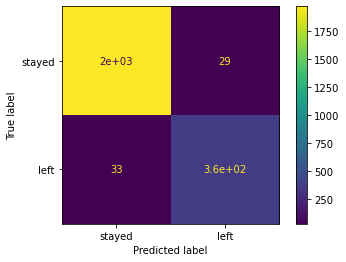

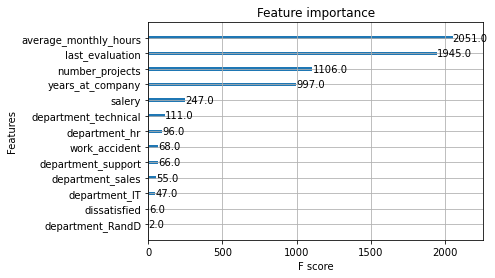

In [129]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, xgb_test_preds, labels=xgb_cv_2.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=['stayed', 'left'])
disp.plot();

plot_importance(xgb_cv_2.best_estimator_);

Now last_evaluation and monthly hours rose in importance a lot to compensate for the missing satisfaction level. Since this is a Gradient Boosting Model, we can't really say how these features contributed to being good estimators, but we know they are. So maybe if we focus our feature engineering on somehow transforming those top predictive features into more understandable form for a logistic regression, we might be able to improve the results from before. But for this case it is already sufficient to look at the top predictive features because there are already clear patterns that can be seen and from which we can draw conclusions.

Text(0.5, 1.0, 'last_valuation by satisfaction_level')

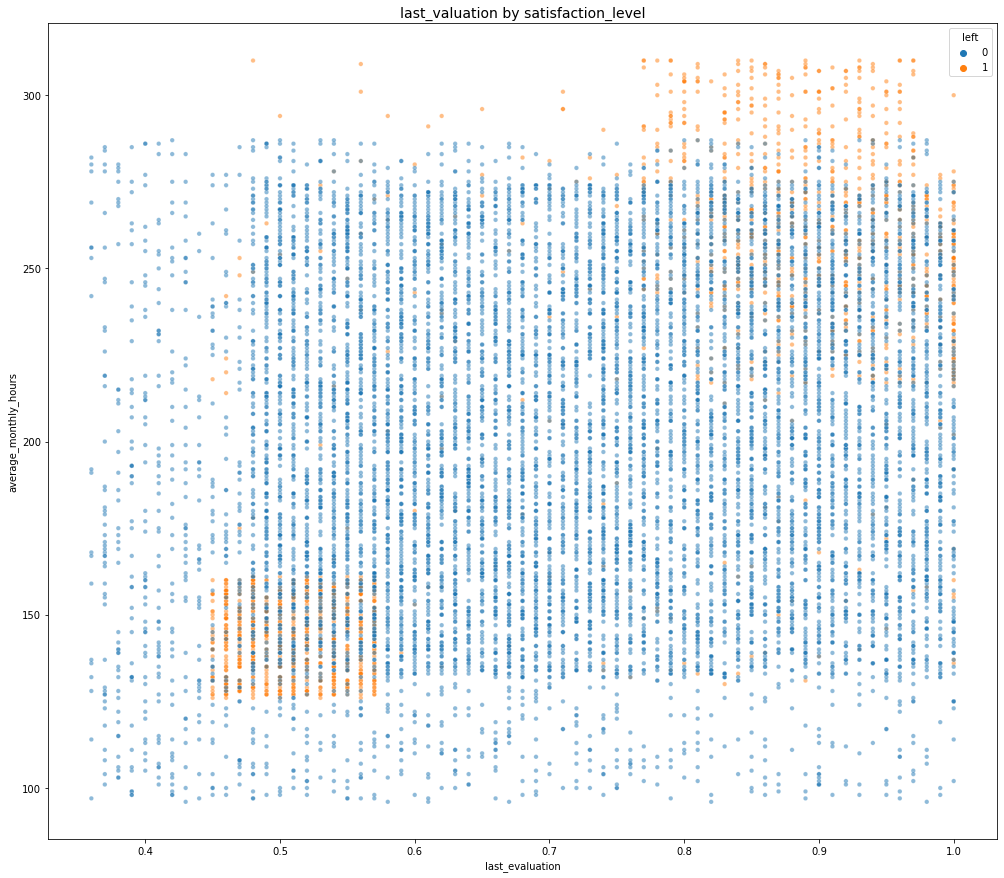

In [130]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(17,15))
ax = sns.scatterplot(data=df, x="last_evaluation", y="average_monthly_hours", hue="left", s=20, alpha=0.5)

ax.set_title('last_valuation by satisfaction_level', fontsize='14')

These are the topmost predictive features, and we can see that employees working more then 290h will most certainly all leave. As well as a cluster of low average hours and low evaluation. These people might be frustrated because they think they would have to work more hours to get better evaluations.

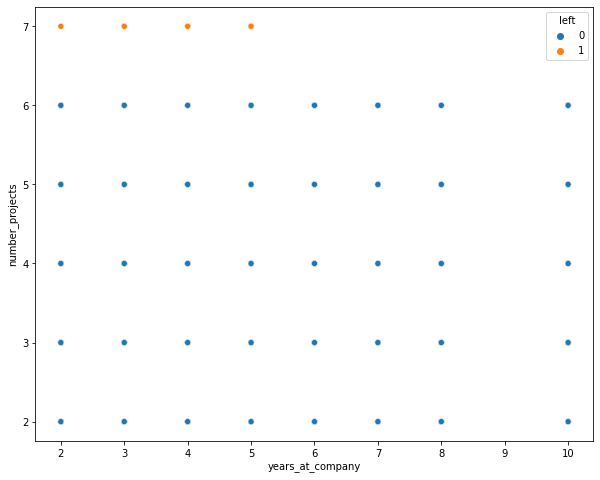

In [131]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x="years_at_company", y="number_projects", hue="left")

These are the 3rd and 4th most important features. Here we see that all employees that worked on 7 projects left the company. And also that people working for more than 5 years at the company don't leave anymore. From previous EDA we also know that most employees leave at year 3 at the company.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

#### Logistic Regression

The logistic regression model had percision:0.79 recall:0.83 f1:0.79. But a lot of false positives which is suboptimal for our case.

#### Gradient Boosting
In the second model we achived with feature engineering on the test data: percision:0.926396 recall:0.917085 f1:0.921717 accuracy: 0.974156. With a lot fewer false positives


### Conclusion, Recommendations, Next Steps

The feature importance of our Gradient Boosting Model shows that there are people that are working to many hours as well as working on too many project are leaving the company.

to retain employees following recomendations could be made:
- cap the numer of projects to maximum 6
- reward employees that work a lot of hours or don't require them to
- comunicate that no one is required to do those long hours if they don't want to
- reward employees not only based on hours they spend also on there evaluation score and make sure that the evaluation score is not linked to time you spend at the company to not frustrate people that work less hours

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.